# Anthony Iarussi and Emilie Dibbin

## Problem Statement and Background

This data set allows exploration of how different variables impact defaulting on credit card payments. We will look at individual interactions of these variables, as well as using machine learning to predict the probability of an individual defaulting on their credit card payments. This is an important issue today, that companies have turned to data science to help solve. From this data set we will model high risk user characteristics and credit card payment history. As this model includes longitudinal data, it can be used as a tool to assess risk in real time. Unlike credit scores the model will also take into account important personal characteristics such as age, gender, marital status and education level. The problem of assessing credit risk is decades old. Due to the influx of credit card users in many countries, it has become necessary to use all means to assess risk in individuals.

In recent years there has been an arrival of data, in all industries. Data gained in recent years has been used to evaluate possible decisions and reinforce decisions being made. Industries that deal with risk have benefited greatly from various data mining methods. For companies that deal with credit cards, assessing risk can make or break the company. In a paper published by Shenghui Yang and Haomin Zhang, they compare several data mining methods to predict default rate in the same Twain data set. The three methods used are logistic regression, neural networks, and SVM pattern recognition (Yang). Another paper published by I-Cheng Yeh and Che-hui Lien compares six data mining methods to predict default rate in the same Twain data set. The six methods used are K-nearest neighbor, logistic regression, neural networks, Naive Bayesian, discriminant analysis, and classification trees. In determining the conclusion  I-Cheng Yeh and Che-hui Lien used simple linear regression to produce a line of best fit for the predicted v.s. the actual probability of default rate for each method in order to determine the most accurate probability (Yeh). 

Credit card data is private to individuals and institutions, providing a difficult window for data mining. As I have seen from the Twain data set alone, there has been multiple academic papers produced. This sheds light on the importance of the problem at hand, predicting the default rate of individuals based on their data. We have determined we will explore that question using two different data mining techniques. Once a probability is derived we will perform a proof of work based on I-Cheng Yeh and Che-hui Lien use of simple linear regression (Yeh).

## The Data Source(s) You Intend to Use

Data Source: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

The main data source for this project will be ‘The Default of Credit Card Clients Dataset”, which can be found on Kaggle. The original dataset comes from the University of California’s School of Information and Computer Science, from the online machine learning repository. The dataset has information on 30000 individuals from Taiwan, over the time period of April 2005 to September 2005. The data has 25 variables, including attributes like gender, education, marriage status, and age. The data also contains variables that follow the billing and statuses for each credit card holder monthly. Included among these variables is a response variable, default.payment.next.month, telling whether or not the individual had defaulted on the credit card the next month. All variables with less than 20% missing or unknown values will be explored and used in modelling.

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
%matplotlib inline

In [252]:
master = pd.read_csv('UCI_Credit_Card.csv')

In [253]:
df = master
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [254]:
cards_shape= df.shape
print("Number of people:" ,cards_shape[0])
print("Number of columns:", cards_shape[1])

Number of people: 30000
Number of columns: 25


## Data Flaws/Weaknesses and Cleaning

In [255]:
df = df.rename(columns={'default.payment.next.month': 'default_pay','PAY_0':'PAY_Sept','PAY_2':'PAY_August','PAY_3':'PAY_July','PAY_4':'PAY_June','PAY_5':'PAY_May','PAY_6':'PAY_April','BILL_AMT6': 'BILL_AMT_April', 'BILL_AMT5': 'BILL_AMT_May', 'BILL_AMT4': 'BILL_AMT_June', 'BILL_AMT3': 'BILL_AMT_July', 'BILL_AMT2': 'BILL_AMT_August', 'BILL_AMT1': 'BILL_AMT_Sept', 'PAY_AMT6': 'PAY_AMT_April', 'PAY_AMT5': 'PAY_AMT_May', 'PAY_AMT4': 'PAY_AMT_June', 'PAY_AMT3': 'PAY_AMT_July', 'PAY_AMT2': 'PAY_AMT_August', 'PAY_AMT1': 'PAY_AMT_Sept' } )
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sept,PAY_August,PAY_July,PAY_June,...,BILL_AMT_June,BILL_AMT_May,BILL_AMT_April,PAY_AMT_Sept,PAY_AMT_August,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Above we changed the names of various columns to better reflect our data. The original data has numbers reflecting months in the various columns for bill amount and payment amount, we inserted months to make the data easier to understand. 

In [256]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sept,PAY_August,PAY_July,PAY_June,...,BILL_AMT_June,BILL_AMT_May,BILL_AMT_April,PAY_AMT_Sept,PAY_AMT_August,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,default_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Some initial observations after describing the data by column is that Education and Marriage have a minimum value of zero, which does not have an assigned value for both education and marriage. The youngest age included in the data set is 21, while the oldest is 79. Also, the max limit balance of 1,000,000 seems rather high, I will investigate the numbers surrounding users with a rather high limit balance to make sure there are no outliers. 

In order to clean the data we will assign names to the values listed in columns Sex, Education, Marrriage, default_pay and the new group we generated age_grouped.

### Categorical

#### Sex

In [257]:
fil = (df.SEX == 1) 
df.loc[fil, 'SEX'] = 'Male'
fil = (df.SEX == 2) 
df.loc[fil, 'SEX'] = 'Female'

In [258]:
df['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

The data set contains 6,224 more females than men.

#### Education 

In [259]:
fil = (df.EDUCATION == 1) 
df.loc[fil, 'EDUCATION'] = 'Graduate School'
fil = (df.EDUCATION == 2) 
df.loc[fil, 'EDUCATION'] = 'University'
fil = (df.EDUCATION == 3) 
df.loc[fil, 'EDUCATION'] = 'High School'
fil = (df.EDUCATION == 4) 
df.loc[fil, 'EDUCATION'] = 'Other'
fil = (df.EDUCATION == 5) | (df.EDUCATION==6) | (df.EDUCATION==0)
df.loc[fil, 'EDUCATION'] = 'Unknown'

The data set considers values of 5 and 6 unknown, so we have grouped them into a collective unknown group. We have also included all 0 values in the unknown group.

In [260]:
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
Unknown              345
Other                123
Name: EDUCATION, dtype: int64

Approximately 46.76% of the individuals in the data set have been to University. While 35.28% attended graduate school, and the remaining 17.6% either attended only high school or have reached an unlisted or unknown level of education.

#### Marriage

In [261]:
fil = (df.MARRIAGE == 2) 
df.loc[fil, 'MARRIAGE'] = 'Single'
fil = (df.MARRIAGE == 1) 
df.loc[fil, 'MARRIAGE'] = 'Married'
fil = (df.MARRIAGE == 3) | (df.MARRIAGE == 0) 
df.loc[fil, 'MARRIAGE'] = 'Other'

We have included all marriage valued at 0 in the 'Other' group, based off of speculation the other group could represent divorced individuals or individuals who do not consider themselves Married or Single.

In [262]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Other        377
Name: MARRIAGE, dtype: int64

A slight majority of the individuals reported being single, while the rest are either married or considered to be in some other form of relationship. 

#### Age Grouped

I have created a new variable, age group, grouping the ages into 5 seperate groups

In [263]:
fil = (df.AGE < 30) #Youngest age in the data set is 21
df.loc[fil, 'AGE_GROUPED'] = '20s'
fil = (df.AGE > 30) & (df.AGE < 40) 
df.loc[fil, 'AGE_GROUPED'] = '30s'
fil = (df.AGE > 40) & (df.AGE < 50) 
df.loc[fil, 'AGE_GROUPED'] = '40s'
fil = (df.AGE > 50) & (df.AGE < 60) 
df.loc[fil, 'AGE_GROUPED'] = '50s'
fil = (df.AGE > 59)
df.loc[fil, 'AGE_GROUPED'] = '60+'

In [264]:
df['AGE_GROUPED'].value_counts()

30s    9843
20s    9618
40s    5594
50s    1930
60+     339
Name: AGE_GROUPED, dtype: int64

The 20s and 30s groups make up close to two thirds of the individuals, while the remaining one third is made up of individuals in their 40s, 50s, and 60s.

#### Default Pay

In [265]:
fil = (df.default_pay == 0) 
df.loc[fil, 'default_pay'] = 'NODefault'
fil = (df.default_pay == 1) 
df.loc[fil, 'default_pay'] = 'YESDefault'

In [266]:
df['default_pay'].value_counts()

NODefault     23364
YESDefault     6636
Name: default_pay, dtype: int64

Approximately 74.54% of individuals did not default on their credit card.

### Numerical 

#### Limit Balance

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


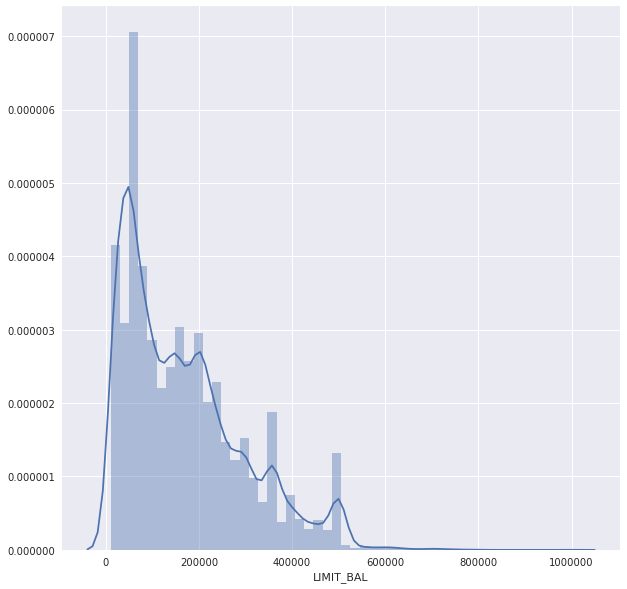

In [267]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df.LIMIT_BAL)

The distribution of limit balance appears to be within a reasonable range. Although it appears a large fraction of clients are receiving a limit balance that exceeds 200,000 NT dollars.

Next I looked at credit card holders that paid a balance of more than 275,000 NT dollars in September, and all numbers seem reasonable and relative for our outliers.

In [268]:
df[df.PAY_AMT_Sept > 275000][['LIMIT_BAL', 'PAY_Sept', 'PAY_August', 'BILL_AMT_August', 
                          'PAY_AMT_Sept', 'BILL_AMT_Sept', 'default_pay']]

,LIMIT_BAL,PAY_Sept,PAY_August,BILL_AMT_August,PAY_AMT_Sept,BILL_AMT_Sept,default_pay
2687,500000.0,-2,-1,367979.0,368199.0,71921.0,NODefault
3220,310000.0,-2,-2,298887.0,298887.0,0.0,NODefault
5687,480000.0,0,0,400000.0,302000.0,106660.0,NODefault
6773,470000.0,0,0,488642.0,300000.0,491428.0,YESDefault
8500,400000.0,-1,-1,405016.0,405016.0,6500.0,NODefault
12330,300000.0,1,-1,324392.0,505000.0,-165580.0,NODefault
17767,320000.0,0,0,281060.0,276698.0,188373.0,NODefault
25431,170000.0,0,-1,167941.0,304815.0,30860.0,NODefault
28003,510000.0,-1,-1,481382.0,493358.0,71121.0,NODefault
28716,340000.0,-1,-1,176743.0,873552.0,139808.0,NODefault


#### Repayment Status

The PAY_Sept variable is the individual's payment status in September, or at the end of the 5 months. PAY_August variable is the individual's payment status in August, and so on through to the PAY_April variable. In the early summary of variables it is clear that PAY_Month variables range from -2 to 8. Values 1 through 8 can be interpretted as the amount of months a payment has been delayed for the individual. 

The values of -2 to 0 can be interpretted based on industry standard. 
- -2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)
- -1 = Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due
-  0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance

https://www.investopedia.com/terms/m/minimum-monthly-payment.asp

Now that the PAY_month variables have been described let us view their distribution.

In [269]:
pay=pd.melt(df, id_vars=["ID"], value_vars= ["PAY_Sept","PAY_August","PAY_July","PAY_June", "PAY_May", "PAY_April"])

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


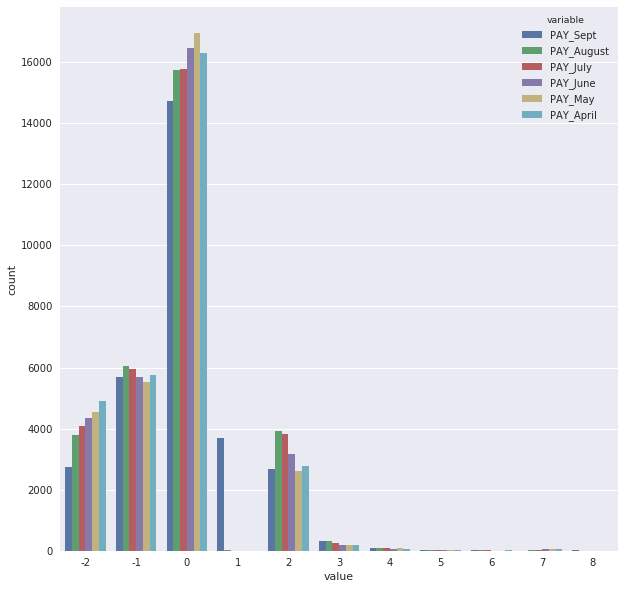

In [270]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x='value', hue= 'variable', data= pay)

After looking at the distributions of the 6 months a common distribution is clear among the PAY_month variables. Most payments are made on time while the rest end up being two months late.

#### Bill Amount

This data set contains 6 bill amount variables, one for each month. The bill amount variable shows the current amount of a cardholders bill in the specified month, in NT dollars.

I took a look at the distribution of bill amounts for the cardholders from April to June to spot a trend in the distribution.

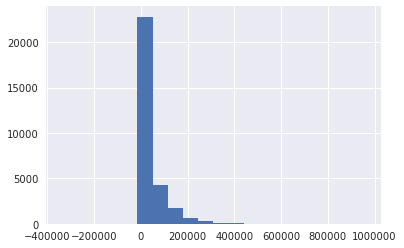

In [271]:
df.BILL_AMT_April.hist(bins = 20)

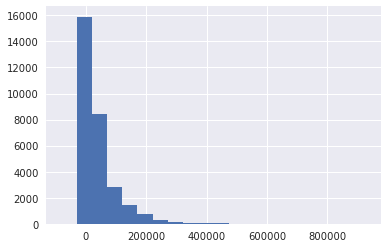

In [272]:
df.BILL_AMT_May.hist(bins = 20)

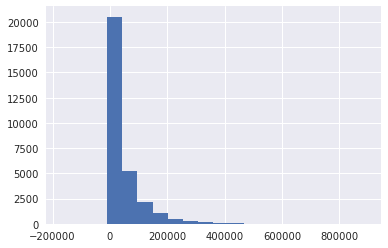

In [273]:
df.BILL_AMT_June.hist(bins = 20)

#### Pay Amount

This data set contains 6 payment amount variables, one for each month. The PAY_AMT_month variable is the amount of a previous payment in the month specified.

I took a look at the distribution of pay amounts for the cardholders from April to June to identify a basic trend in the distribution.

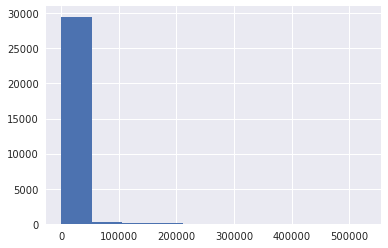

In [274]:
df.PAY_AMT_April.hist(bins = 10)

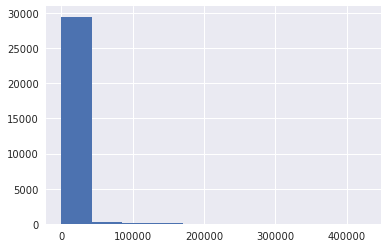

In [275]:
df.PAY_AMT_May.hist(bins = 10)

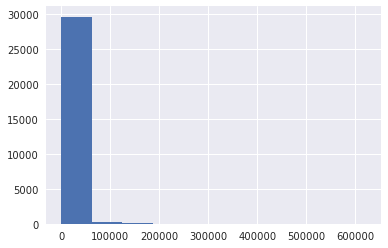

In [276]:
df.PAY_AMT_June.hist(bins=10)

#### Age

Along with breaking down age into groups categorically. The data set provides us with the specific age of each cardholder, all of which are older than 20 and younger than 80.

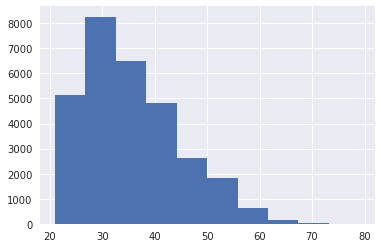

In [277]:
df.AGE.hist()

## Basic Data Characteristics

The focus of this section breaks default rates by different groupings.

#### Default rates by Education

In [278]:
education = df.groupby(['EDUCATION', 'default_pay']).size().unstack(1)
education['% defaulted'] = (education['YESDefault']/(education['NODefault'] + education['YESDefault']))
education

default_pay,NODefault,YESDefault,% defaulted
EDUCATION,,,
Graduate School,8549,2036,0.192348
High School,3680,1237,0.251576
Other,116,7,0.056911
University,10700,3330,0.237349
Unknown,319,26,0.075362


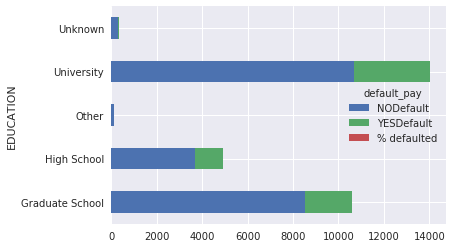

In [279]:
education.plot(kind='barh', stacked = True)

When focusing on the three main categories, with a reasonable sample size you end up with: High School, Gradation, and Graduate School. The highest default rates among the three are high school with 25.15%, second highest with University at 23.73%, and the lowest default rate among those who attended graduate school at 19.23%. This makes sense in regard to an early hypothesis that the higher your education the less likely you are to default on your credit card.

#### Default rates by Marriage

In [280]:
marriage = df.groupby(['MARRIAGE', 'default_pay']).size().unstack(1)
marriage['% defaulted'] = (marriage['YESDefault']/(marriage['NODefault'] + marriage['YESDefault']))
marriage

default_pay,NODefault,YESDefault,% defaulted
MARRIAGE,,,
Married,10453,3206,0.234717
Other,288,89,0.236074
Single,12623,3341,0.209283


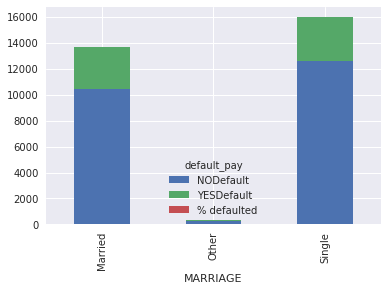

In [281]:
marriage.plot(kind='bar', stacked = True)

The group labeled other which I theorized could consist of divorced individuals or individuals who may have lost a spouse had the highest credit card default rate at 23.60%. Coming in a close second highest is Married individuals with a default rate of 23.47%. Single individuals have the lowest default rate at 20.92%. 

#### Default rate by Gender

In [282]:
gender = df.groupby(['SEX', 'default_pay']).size().unstack(1)
gender['% defaulted'] = (gender['YESDefault']/(gender['NODefault'] + gender['YESDefault']))
gender

default_pay,NODefault,YESDefault,% defaulted
SEX,,,
Female,14349,3763,0.207763
Male,9015,2873,0.241672


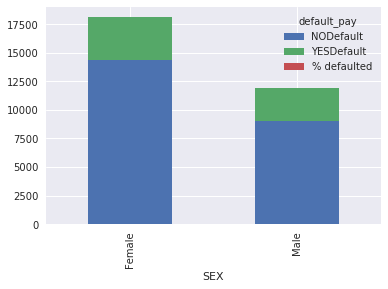

In [283]:
gender.plot(kind='bar', stacked = True)

It is clear the males are more prone to default on credit cards by about 4%. As males have a default rate of 24.16% and females have a default rate of 20.77%.

#### Default rate by Age Grouped

In [284]:
age_group = df.groupby(['AGE_GROUPED', 'default_pay']).size().unstack(1)
age_group['% defaulted'] = (age_group['YESDefault']/(age_group['NODefault'] + age_group['YESDefault']))
age_group

default_pay,NODefault,YESDefault,% defaulted
AGE_GROUPED,,,
20s,7421,2197,0.228426
30s,7841,2002,0.203393
40s,4296,1298,0.232034
50s,1449,481,0.249223
60+,243,96,0.283186


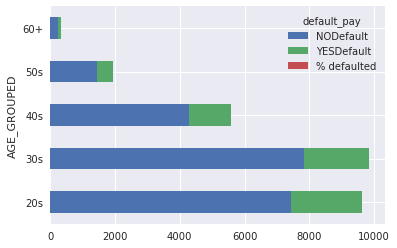

In [285]:
age_group.plot(kind='barh', stacked = True)

The age group with the highest default rate is 60+ with 28.31%. The sample size for the 60+ age group is relatively small compared to the rest of the data set. The second highest default rate is among card holders in their 50s at 24.92%, then cardholders in their 40s at 23.20%, then cardholders in their 20s at 22.84%, and lastly 30s with the lowest default rate of 20.33%. This came to be a surprise as I initially predicted cardholders in their 20s would have the highest default rate amongst the age groups.

## Surprises

After exploring default rates by specific attributes and establishing the rates according to these groups, it is beneficial to look at the mean limit balance according to these groups. This will indicate whether or not the company follows any risk assessment when dealing with cardholders.

#### Limit balance by Marrital status

There is not substantial difference in limit balance between single and married individuals. I was expecting married indiviuals to have greater balance limits than single individuals.

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


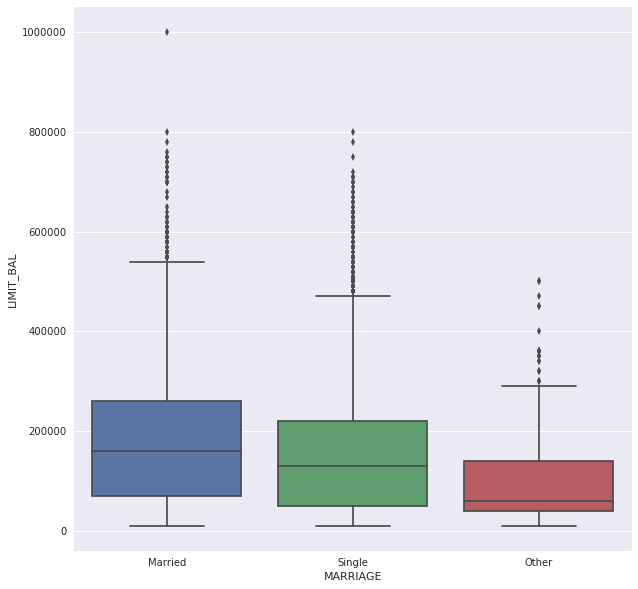

In [286]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", data=df) 

#### Limit Balance by Gender

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


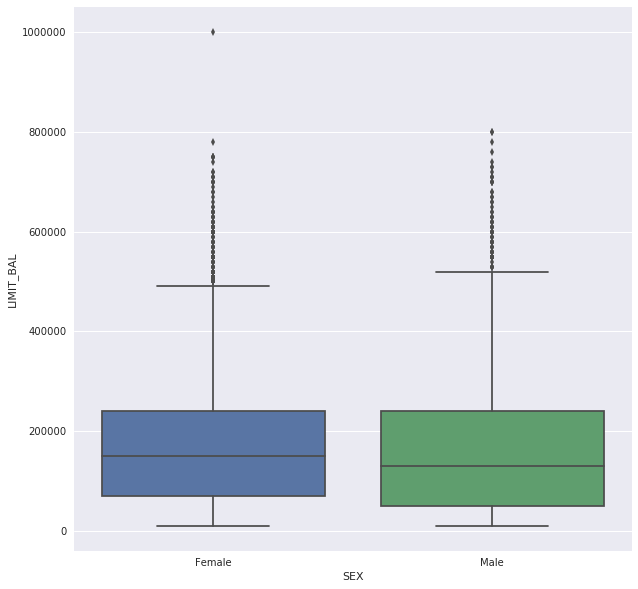

In [287]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="SEX", y="LIMIT_BAL", data=df) 

The limit balance granted between genders is nearly equal. This came as a surprise as men are considered a higher default risk, yet they are only placed at a slightly lower mean than females.

#### Limit Balance by Education

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


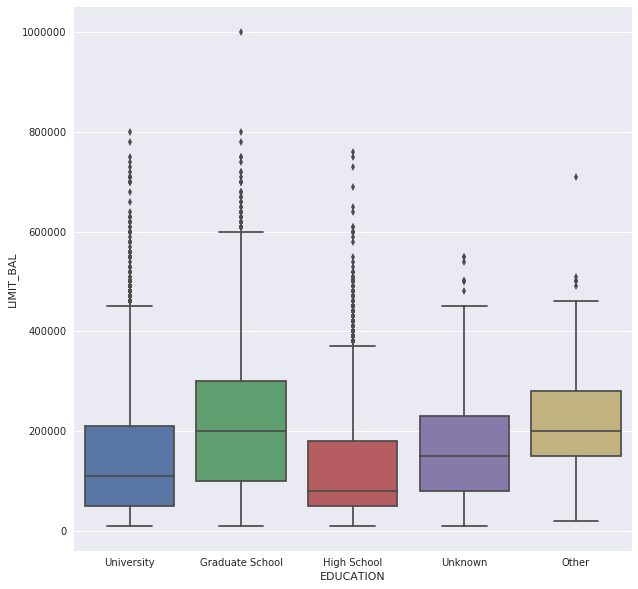

In [288]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data = df)

This did not come as a surprise, as the order of mean limit balance follows the exact order of default rate percentage for the 3 main groups: high school, university, and graduate school. The lowest default rate and highest mean limit balance is the graduate school group, then university, and lastly high school with the lowest mean limit balance and highest default rate.


The patterns following those of the default rates proves that the company dealing to the cardholders has at least a loose system in check to asses risk when dealing credit. It is clearly seen in education and gender. But not for marriage status, as married individuals have a higher default rate and a higher mean limit balance.

## K-Means Custering

In [289]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


I will use the orignal data set as the categorical variables are still valued with numbers. 

In [290]:
creditcard = master
creditcard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [291]:
np.random.seed(0)

In [292]:
from sklearn.preprocessing import StandardScaler

X = creditcard.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.31413612,
        -0.29338206,  1.87637834],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.31413612,
        -0.18087821,  1.87637834],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24868274,
        -0.01212243, -0.53294156],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.18322937,
        -0.11900109,  1.87637834],
       [-0.67427636, -1.23432296,  1.45111372, ...,  3.15253642,
        -0.19190359,  1.87637834],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24868274,
        -0.23713013,  1.87637834]])

In [293]:
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 2 2 ... 0 2 2]


In [294]:
creditcard["Labels"] = labels
creditcard.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Labels
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,2
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,2


In [295]:
creditcard.groupby('Labels').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
Labels,,,,,,,,,,,,,,,,,,,,,
0,14828.275053,75284.800487,1.550411,2.003046,1.530917,35.164179,1.636613,1.843131,1.785867,1.660372,...,38810.426135,37666.095949,37298.586354,2133.056046,2045.185806,1871.214133,1769.697228,1912.458118,1944.374048,0.717636
1,15522.648220,288754.914747,1.570147,1.801675,1.507927,37.096620,0.206102,0.176488,0.150165,0.111576,...,184941.950045,172464.176787,165305.868083,16755.260544,18104.431947,15832.007478,13540.597069,13489.748130,13835.386778,0.176189
2,14950.168155,120798.790148,1.592899,1.964713,1.611695,34.329108,0.081881,0.077632,0.089731,0.034711,...,36086.397451,32810.124370,31371.752268,4489.995679,4387.685655,3747.528302,3502.492871,3444.820971,3782.505185,0.153392
3,14949.781303,224984.190556,1.649874,1.656092,1.487036,36.721438,-0.811551,-1.236509,-1.327677,-1.362352,...,5387.561762,5642.401560,5844.844435,4694.738196,5213.958790,4812.676012,4750.269604,4718.804490,5407.475970,0.164524


After k-means clustering the data set by all variable I am able to profile cardholders into 4 differents groups.
- 0: This group exhibits the most risk, with a close mean to 1 in credit card default and the lowest limit balance. This group seems to be consistently behind on payments with high bill amounts and low pay amounts.
- 1: This group contains the outlier clients towards the weealthy end of the spectrum, with the highest limit balance and large bill amounts to go with large payments. 
- 2: This group has the second lowest limit balance, but does not appear to fall very behind on payments, although the average bill amount is 6-7 times higher than the payment amount. This group exhibits the lowest default rates.
- 3: This group seems to mimic the average cardholder with a moderate bill amount with a near pay amount, this group exhibits low risk and has the second largest limit balance.

In [296]:
default_group = creditcard[creditcard['Labels'] == 0]
default_group.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Labels
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,...,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.0
mean,14828.275053,75284.800487,1.550411,2.003046,1.530917,35.164179,1.636613,1.843131,1.785867,1.660372,...,37666.095949,37298.586354,2133.056046,2045.185806,1871.214133,1769.697228,1912.458118,1944.374048,0.717636,0.0
std,8369.067469,65374.300149,0.497528,0.669245,0.524713,9.863179,1.140827,1.080576,1.154762,1.315116,...,33369.260594,33753.530585,3234.449760,3305.352736,4366.068688,3832.832948,4389.793303,5740.628824,0.450218,0.0
min,14.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-610.000000,-1560.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,7673.500000,30000.000000,1.000000,2.000000,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,...,15083.000000,14410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,15384.000000,50000.000000,2.000000,2.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,...,27454.000000,27184.000000,1597.000000,1500.000000,1100.000000,1000.000000,1000.000000,1000.000000,1.000000,0.0
75%,21302.000000,100000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,...,50196.500000,50170.000000,3025.500000,3000.000000,2475.000000,2200.000000,2295.000000,2145.000000,1.000000,0.0
max,29998.000000,500000.000000,2.000000,6.000000,3.000000,73.000000,8.000000,8.000000,8.000000,8.000000,...,227800.000000,225044.000000,59872.000000,106000.000000,142848.000000,103000.000000,102075.000000,120862.000000,1.000000,0.0


In [297]:
dfr = default_group.rename(columns={'default.payment.next.month': 'default_pay'})

In [298]:
fil = (dfr.default_pay == 0) 
dfr.loc[fil, 'default_pay'] = 'NODefault'
fil = (dfr.default_pay == 1) 
dfr.loc[fil, 'default_pay'] = 'YESDefault'
fil = (dfr.SEX == 1) 
dfr.loc[fil, 'SEX'] = 'Male'
fil = (dfr.SEX == 2) 
dfr.loc[fil, 'SEX'] = 'Female'
fil = (dfr.EDUCATION == 1) 
dfr.loc[fil, 'EDUCATION'] = 'Graduate School'
fil = (dfr.EDUCATION == 2) 
dfr.loc[fil, 'EDUCATION'] = 'University'
fil = (dfr.EDUCATION == 3) 
dfr.loc[fil, 'EDUCATION'] = 'High School'
fil = (dfr.EDUCATION == 4) 
dfr.loc[fil, 'EDUCATION'] = 'Other'
fil = (dfr.EDUCATION == 5) | (dfr.EDUCATION==6) | (dfr.EDUCATION==0)
dfr.loc[fil, 'EDUCATION'] = 'Unknown'
fil = (dfr.MARRIAGE == 2) 
dfr.loc[fil, 'MARRIAGE'] = 'Single'
fil = (dfr.MARRIAGE == 1) 
dfr.loc[fil, 'MARRIAGE'] = 'Married'
fil = (dfr.MARRIAGE == 3) | (dfr.MARRIAGE == 0) 
dfr.loc[fil, 'MARRIAGE'] = 'Other'
fil = (dfr.AGE < 30) #Youngest age in the data set is 21
dfr.loc[fil, 'AGE_GROUPED'] = '20s'
fil = (dfr.AGE > 30) & (dfr.AGE < 40) 
dfr.loc[fil, 'AGE_GROUPED'] = '30s'
fil = (dfr.AGE > 40) & (dfr.AGE < 50) 
dfr.loc[fil, 'AGE_GROUPED'] = '40s'
fil = (dfr.AGE > 50) & (dfr.AGE < 60) 
dfr.loc[fil, 'AGE_GROUPED'] = '50s'
fil = (dfr.AGE > 59)
dfr.loc[fil, 'AGE_GROUPED'] = '60+'

In [299]:
dfr['default_pay'].value_counts()

YESDefault    2356
NODefault      927
Name: default_pay, dtype: int64

In [300]:
dfr['EDUCATION'].value_counts()

University         1836
High School         724
Graduate School     721
Unknown               2
Name: EDUCATION, dtype: int64

In [301]:
dfr['SEX'].value_counts()

Female    1807
Male      1476
Name: SEX, dtype: int64

In [302]:
dfr['MARRIAGE'].value_counts()

Single     1681
Married    1559
Other        43
Name: MARRIAGE, dtype: int64

In [303]:
dfr['AGE_GROUPED'].value_counts()

20s    1221
30s     896
40s     611
50s     252
60+      38
Name: AGE_GROUPED, dtype: int64

## Random Forest

In [304]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

import seaborn as sns

In [305]:
master = pd.read_csv('UCI_Credit_Card.csv')


dfrf = master.rename(columns={'default.payment.next.month': 'default_pay'})
fil = (dfrf.EDUCATION == 5) | (dfrf.EDUCATION==6) | (dfrf.EDUCATION==0)
dfrf.loc[fil, 'EDUCATION'] = 5
fil = (dfrf.MARRIAGE == 3) | (dfrf.MARRIAGE == 0)
dfrf.loc[fil, 'MARRIAGE'] = 3
dfrf.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [306]:
labels = np.array(dfrf['default_pay'])

In [307]:
features = dfrf.drop(['default_pay', 'ID'], axis = 1)

In [308]:
train_features, test_features, train_labels, test_labels = \
train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [309]:
print("Size of the training data", train_features.shape)
print("Size of the test data", test_features.shape)
print("Size of the training labels", train_labels.shape)
print("Size of the test labels", test_labels.shape)

Size of the training data (22500, 23)
Size of the test data (7500, 23)
Size of the training labels (22500,)
Size of the test labels (7500,)


In [310]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [311]:
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [312]:
predictions = rf.predict(test_features)

In [313]:
cm = confusion_matrix(test_labels, predictions)
print(cm)

[[5523  350]
 [1050  577]]


/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


In [314]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.62      0.35      0.45      1627

   micro avg       0.81      0.81      0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500



In [315]:
accuracy_score(y_true = test_labels, y_pred = predictions)

0.8133333333333334

In [316]:
#cross_val_score(rf, train_features, train_labels, cv = 10)

In [317]:
feature_importance = list(zip(train_features, rf.feature_importances_))
df_FI = pd.DataFrame(feature_importance)
feat_importance = df_FI.rename(columns={0: 'Feature', 1:'Importance'})
feat_sort = feat_importance.sort_values(by=['Importance'],ascending=False)
feat_sort

,Feature,Importance
5,PAY_0,0.101348
4,AGE,0.067152
0,LIMIT_BAL,0.060247
11,BILL_AMT1,0.059210
12,BILL_AMT2,0.054859
13,BILL_AMT3,0.050680
15,BILL_AMT5,0.050217
17,PAY_AMT1,0.050014
16,BILL_AMT6,0.049490
14,BILL_AMT4,0.049179


## Logistic Regression 

In [318]:
from sklearn.linear_model import LogisticRegression

In [319]:
features = dfrf[['PAY_0', 'AGE', "LIMIT_BAL"]]

In [320]:
train_features, test_features, train_labels, test_labels = \
train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [321]:
LRmodel = LogisticRegression()

In [322]:
LRmodel.fit(train_features, train_labels)

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [323]:
pred = LRmodel.predict(test_features)

In [324]:
cm = confusion_matrix(test_labels, pred)
print(cm)

[[5873    0]
 [1627    0]]


/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


In [325]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5873
           1       0.00      0.00      0.00      1627

   micro avg       0.78      0.78      0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.69      7500



/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Support Vector Machine

In [326]:
from sklearn.svm import SVC
model=SVC(gamma = 'auto')

In [327]:
features = dfrf.drop(['default_pay', 'ID'], axis = 1)

In [328]:
train_features, test_features, train_labels, test_labels = \
train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [329]:
model.fit(train_features, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [330]:
pred = model.predict(test_features)

In [331]:
cm = confusion_matrix(test_labels, pred)
print(cm)

[[5850   23]
 [1608   19]]


/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


In [332]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5873
           1       0.45      0.01      0.02      1627

   micro avg       0.78      0.78      0.78      7500
   macro avg       0.62      0.50      0.45      7500
weighted avg       0.71      0.78      0.69      7500

